In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
#1)
#   a)
#     Suppose that the growth function of a simple model ismH(N) =N+ 1.
#     What is the VCdimension,dV C, equal to? Why?

#     VC dimension for a mH(N) = N + 1 is 1 because the break point k=2.
#     dvc = k-1 
#   b)
#     The VC generalization bound (expression 2.12, page 53, of the LFD book) asserts that for any δ > 0, Eout(g) ≤ Ein(g) + r8Nln4mH(2N)δwith probability 1 − δ. 
#     Use the above expression to estimate the probability that Eout will be within e = 0.1 of Ein given that the training set is of size N = 100.

N = 100
epsilon = 0.1
growth = 2*N + 1
delta = 4*growth / np.exp(N * epsilon**2 /8)
delta

709.5275096780147

In [10]:
#   c) 
#     Repeat the above calculation when N = 10^4
#     What is the value of 1 − δ?
#     Hint: (1) Look at the Exercise 2.5 on page 56 of the LFD book. 
#           (2) Note that the whole square root term above is equal to e = 0.1.
#           (3) Also, note that the resulting probability in (b) will not be useful as it will be out of range.
#           The value obtained in (c) is in the proper range.


N = 10000
e = 0.1
mh = 2*N + 1
δ = 4*mh / np.exp(N * e**2 /8)
δ, 1-δ

(0.2981471603789815, 0.7018528396210185)

In [ ]:
# 1 − δ is 0.7018528396210185

In [ ]:
# 2)
#   In HW2, using the MNIST files, you have created a new training set for a binary classification.
#   That was done by changing all labels for all digits different from 5 into label -1, and then changing the labels for digit 5 into label 1.
#   This time, select only rows with labels ‘5’ and ‘1’ from the training and test files (features train.txt and features test.txt ). 
#   Then replace the labels for digit five with ‘-1’. and the labels for digit one with ‘1’.

#     (a) Train a pocket PLA on the training data set and report the final hypothesis (final model in terms of the perceptron weights w).
#     (b) Show the scatter plot of the training data points (blue for label ‘five’, red for ‘non-fives’ and draw the classification boundary (the best PLA hypothesis, that is, the line corresponding to the fitted model).
#     (c) Use the trained PLA to predict the labels in the test set and provide the confusion matrix.
#     (d) Use logistic regression of your favorite programming environment (Python, R, etc.) to fit the training data set.
#         NOTE: you may have to change the values of labels (1, -1) to comply with the specific values/format required by the function which implements logistic regression.
#     (e) Print the values of the parameters of the fitted model; Show the scatter plot of the training data points (blue for label ‘five’, red for ‘non-fives’) along with the classification boundary (the line corresponding to the fitted model).
#     (f) Use the predict method of the logistic regression to classify the points in the test set. Produce the confusion matrix to summarize the result of classification.
#     (g) Plot the ROC curve and display the numeric value of the area under the curve (AUROC).


In [13]:
test = pd.read_csv("features.test.csv")
train = pd.read_csv("features.train.csv")

In [15]:
train.loc[train['DigitLabel'] == 1.0, 'DigitLabel'] = 1.0
train.loc[train['DigitLabel'] == 5.0, 'DigitLabel'] = -1.0

test.loc[test['DigitLabel'] == 1.0, 'DigitLabel'] = 1.0
test.loc[test['DigitLabel'] == 5.0, 'DigitLabel'] = -1.0

In [17]:
trainF = train.drop(train[train['DigitLabel'] != 1.0].index & train[train['DigitLabel']  != -1].index)
testF = test.drop(test[test['DigitLabel'] != 1.0].index & test[test['DigitLabel']  != -1].index)

testF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 16 to 2006
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DigitLabel  424 non-null    float64
 1   Intensity   424 non-null    float64
 2   Symmetry    424 non-null    float64
dtypes: float64(3)
memory usage: 13.2 KB


In [18]:
# a)
pocket = Perceptron(max_iter=10000, n_iter_no_change = 10000)
pocket.fit(trainF[['Intensity','Symmetry']], trainF['DigitLabel'])
pocket.score(trainF[['Intensity','Symmetry']], trainF['DigitLabel'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.9929532351057014

In [20]:
pocket.n_iter_, pocket.coef_ # w1=21.6, w2= 8.21

(10000, array([[21.6 ,  8.21]]))

In [21]:
pocket.intercept_ #w0

array([19.])

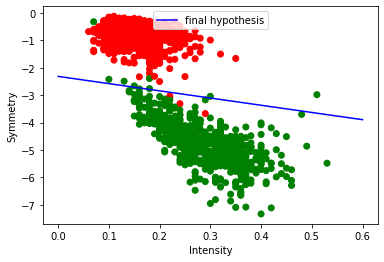

In [22]:
# b) 
 
x = np.linspace(0,0.6,100)
m = (-(19 / 8.21) / (19 / 21.6))
b = -19 / 8.21
h = m*x + b
plt.plot(x, h, '-b', label='final hypothesis') 
colors = {-1:'green', 1:'red'}  
plt.scatter(trainF['Intensity'], trainF['Symmetry'], c=trainF['DigitLabel'].map(colors))
plt.legend(loc='upper center')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.show()

In [24]:
#c
predict = pocket.predict(testF[['Intensity','Symmetry']])
metrics.confusion_matrix(testF['DigitLabel'], predict)

array([[160,   0],
       [  6, 258]])

In [25]:
#d
logisticregression = LogisticRegression(max_iter=10000)
logisticregression.fit(trainF[['Intensity','Symmetry']], trainF['DigitLabel'])
logisticregression.score(trainF[['Intensity','Symmetry']], trainF['DigitLabel'])

0.9955156950672646

In [26]:
# e)
logisticregression.coef_ , logisticregression.intercept_ #w1,w2,w0

(array([[0.26858569, 3.63141818]]), array([9.21945299]))

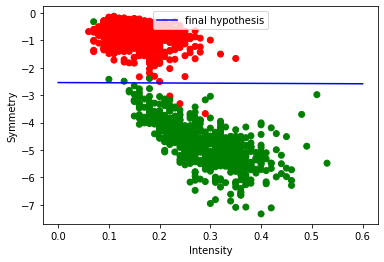

In [27]:
x = np.linspace(0,0.6,100)
m = (-(9.21945299 / 3.63141818) / (9.21945299 / 0.26858569))
b = -(9.21945299 / 3.63141818)
h = m*x + b
plt.plot(x, h, '-b', label='final hypothesis') 

colors = {-1:'green', 1:'red'}  
plt.scatter(trainF['Intensity'], trainF['Symmetry'], c=trainF['DigitLabel'].map(colors))
plt.legend(loc='upper center')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.show()

In [28]:
#f)
logisticregressionpredict = logisticregression.predict(testF[['Intensity','Symmetry']])
metrics.confusion_matrix(testF['DigitLabel'], logisticregressionpredict)

array([[160,   0],
       [  8, 256]])

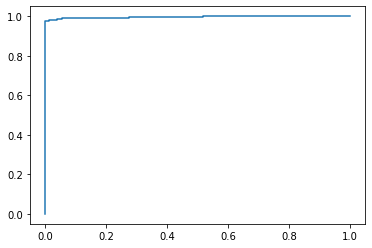

In [29]:
#g)
logisticregressionpredict1 = logisticregression.predict_proba(testF[['Intensity','Symmetry']])
logisticregressionpredict1 = logisticregressionpredict1[:, 1]
logisticregression_auc = roc_auc_score(testF['DigitLabel'], logisticregressionpredict1)
logisticregression_fpr, logisticregression_tpr, _ = roc_curve(testF['DigitLabel'], logisticregressionpredict1)
plt.plot(logisticregression_fpr, logisticregression_tpr)

In [33]:
logisticregression_auc

0.9962594696969698